In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\hp\Downloads\archive (2)\US_Accidents_March23.csv')

# Display basic information
print(df.shape)
print(df.columns)
print(df.head())


(7728394, 46)
Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')
    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016

In [2]:
# Check for nulls
df.isnull().sum().sort_values(ascending=False).head(10)


End_Lat              3402762
End_Lng              3402762
Precipitation(in)    2203586
Wind_Chill(F)        1999019
Wind_Speed(mph)       571233
Visibility(mi)        177098
Wind_Direction        175206
Humidity(%)           174144
Weather_Condition     173459
Temperature(F)        163853
dtype: int64

In [3]:
df = df.dropna(subset=['Start_Time', 'Weather_Condition', 'Visibility(mi)', 'Temperature(F)', 'Humidity(%)'])


In [4]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()


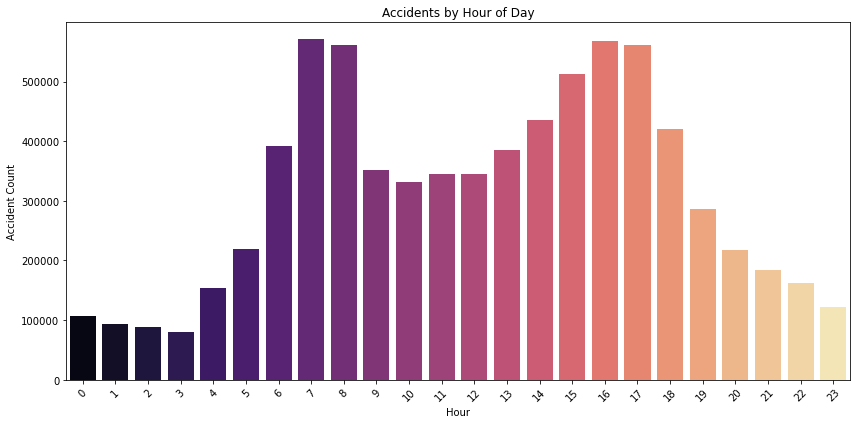

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Hour', palette='magma')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


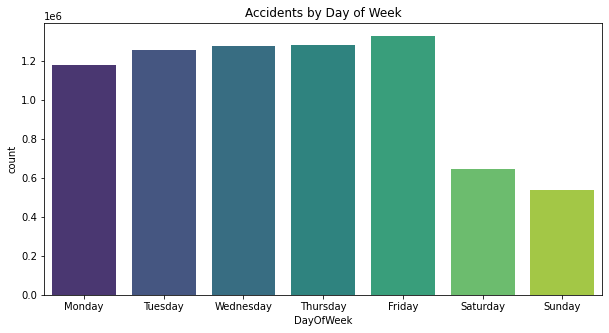

In [6]:
plt.figure(figsize=(10, 5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='DayOfWeek', order=order, palette='viridis')
plt.title('Accidents by Day of Week')
plt.show()


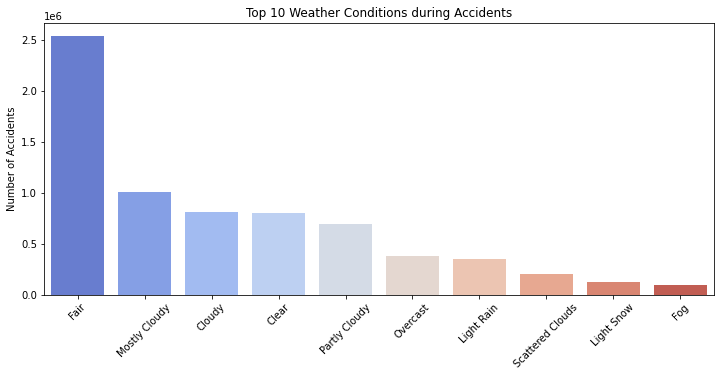

In [7]:
top_weather = df['Weather_Condition'].value_counts().head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_weather.index, y=top_weather.values, palette='coolwarm')
plt.title('Top 10 Weather Conditions during Accidents')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


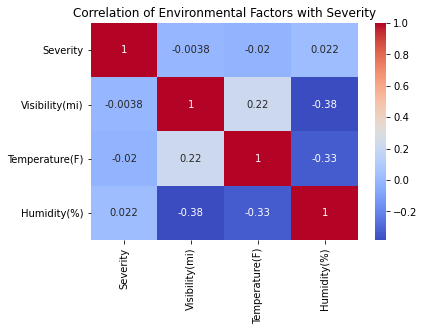

In [8]:
sns.heatmap(df[['Severity', 'Visibility(mi)', 'Temperature(F)', 'Humidity(%)']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of Environmental Factors with Severity")
plt.show()


In [9]:
pip install folium


In [13]:
import folium
from folium.plugins import HeatMap

sample_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(10000)

m = folium.Map(location=[sample_df['Start_Lat'].mean(), sample_df['Start_Lng'].mean()], zoom_start=5)
HeatMap(data=sample_df.values, radius=8).add_to(m)
m.save(r"C:\Users\hp\Downloads\accident_hotspots_map.html")


In [11]:
road_features = ['Junction', 'Traffic_Signal', 'Bump', 'Crossing', 'Stop']

for feature in road_features:
    print(f"{feature} vs Severity")
    print(df.groupby(feature)['Severity'].mean())
    print('---')


Junction vs Severity
Junction
False    2.204525
True     2.297846
Name: Severity, dtype: float64
---
Traffic_Signal vs Severity
Traffic_Signal
False    2.232919
True     2.088699
Name: Severity, dtype: float64
---
Bump vs Severity
Bump
False    2.211471
True     2.094740
Name: Severity, dtype: float64
---
Crossing vs Severity
Crossing
False    2.230451
True     2.063776
Name: Severity, dtype: float64
---
Stop vs Severity
Stop
False    2.215303
True     2.075254
Name: Severity, dtype: float64
---


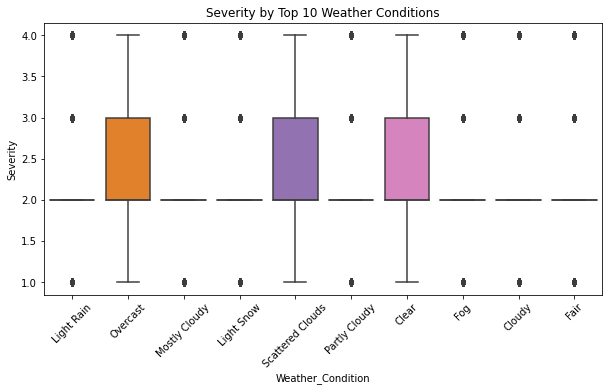

In [12]:
top_conditions = df['Weather_Condition'].value_counts().head(10).index
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[df['Weather_Condition'].isin(top_conditions)],
            x='Weather_Condition', y='Severity')
plt.xticks(rotation=45)
plt.title("Severity by Top 10 Weather Conditions")
plt.show()
